In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


In [5]:
# Define the system of differential equations
def bee_system(state, t, a, b, c):
    x, y, z = state
    dxdt = a * (y - b)
    dydt = b * x - y - x * z
    dzdt = x * y - c * z
    return [dxdt, dydt, dzdt]


In [6]:
# Parameters and initial conditions
a, b, c = 10, 28, 2.667
initial_state = [0, 1, 1.05]
t = np.arange(0, 20, 0.01)  # Simulate from t=0 to t=20 with small steps


In [7]:
# Integrate the equations over time
solution = odeint(bee_system, initial_state, t, args=(a, b, c))
x = solution[:, 0]
y = solution[:, 1]
z = solution[:, 2]


In [8]:
# Optional: Display a small table of results
import pandas as pd
df = pd.DataFrame({'time': t, 'x': x, 'y': y, 'z': z})
print(df.head(10))


   time          x          y          z
0  0.00   0.000000   1.000000   1.050000
1  0.01  -2.712621   0.626246   1.011493
2  0.02  -5.499200  -0.481551   0.982078
3  0.03  -8.434095  -2.344429   1.053628
4  0.04 -11.594079  -4.986408   1.388540
5  0.05 -15.057421  -8.407402   2.233649
6  0.06 -18.899265 -12.534635   3.932291
7  0.07 -23.180694 -17.143543   6.918681
8  0.08 -27.928190 -21.745913  11.662779
9  0.09 -33.101114 -25.470340  18.514854


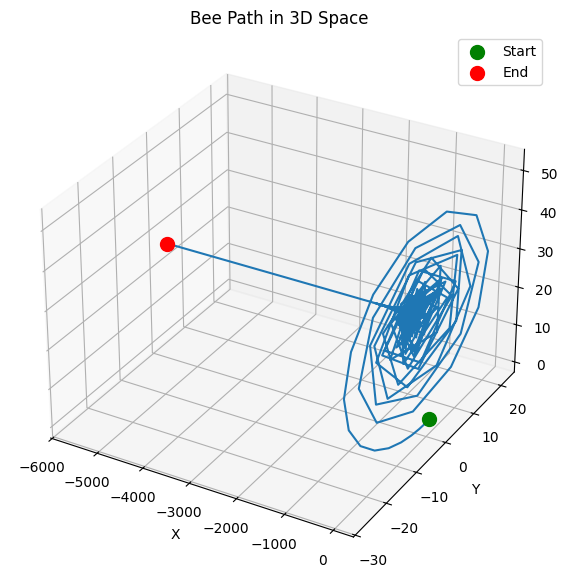

In [12]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)

# Mark the start point (green)
ax.scatter(x[0], y[0], z[0], color='green', s=100, label='Start')

# Mark the end point (red)
ax.scatter(x[-1], y[-1], z[-1], color='red', s=100, label='End')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Bee Path in 3D Space')
ax.legend()
plt.show()
